In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# 1. Đọc data
df = pd.read_csv("Du_lieu_nguoi_di_lam_final.csv")

# Tổng quan thông tin về những người được khảo sát

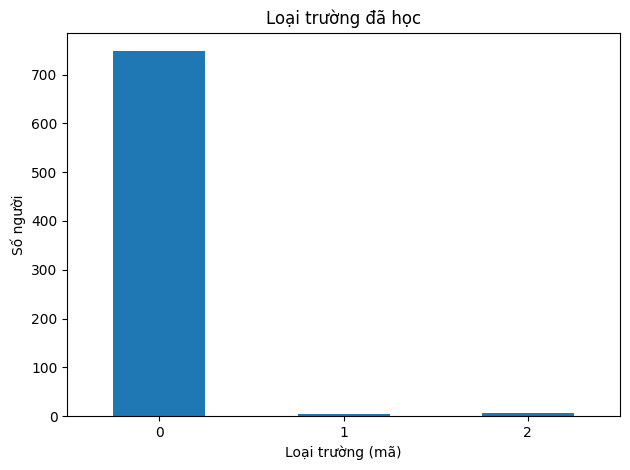

In [55]:
# C. LOẠI TRƯỜNG
plt.figure()
df['p1q2_typeschool'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Loại trường (mã)")
plt.ylabel("Số người")
plt.title("Loại trường đã học")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Hầu hết học trường công lập

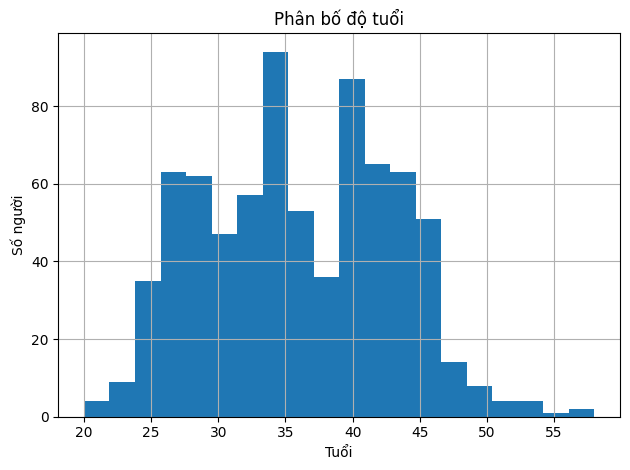

In [56]:
# A. PHÂN BỐ TUỔI
plt.figure()
df['v9'].hist(bins=20)
plt.xlabel("Tuổi")
plt.ylabel("Số người")
plt.title("Phân bố độ tuổi")
plt.tight_layout()
plt.show()

# đối tượng khảo sát là người đi làm từ 20 đến 60 tuổi, tập trung nhiều ở độ tuổi 25-45

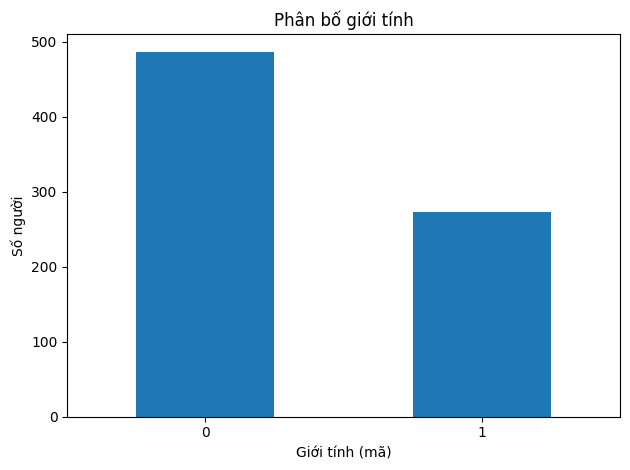

In [57]:
# B. GIỚI TÍNH
plt.figure()
df['p1q5_gender'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Giới tính (mã)")
plt.ylabel("Số người")
plt.title("Phân bố giới tính")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Nam nhiều hơn nữ

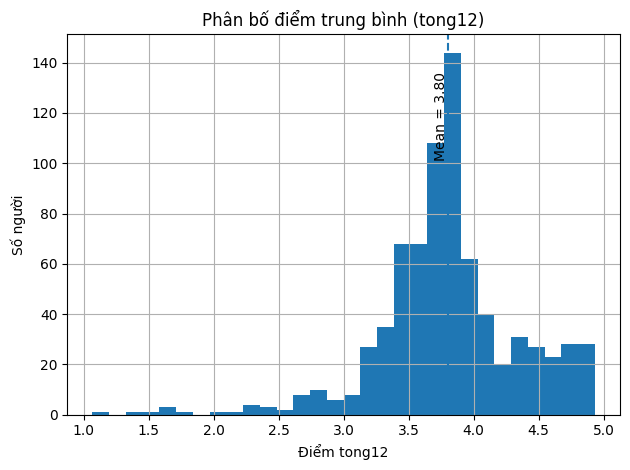

In [58]:
#  ĐIỂM TRUNG BÌNH (tong12)
plt.figure()
df['tong12'].hist(bins=30)
plt.xlabel("Điểm tong12")
plt.ylabel("Số người")
plt.title("Phân bố điểm trung bình (tong12)")

# vẽ thêm đường thẳng thể hiện giá trị trung bình
mean_tong12 = df['tong12'].mean()
plt.axvline(mean_tong12, linestyle='dashed')
plt.text(mean_tong12, plt.ylim()[1]*0.9, f"Mean = {mean_tong12:.2f}", rotation=90,
         va='top', ha='right')
plt.tight_layout()
plt.show()

# Điểm trung bình khoảng 3.8, có một số người có điểm rất thấp 

Text(0.5, 1.0, 'Sau khi học xong THCS, anh/chị làm gì?')

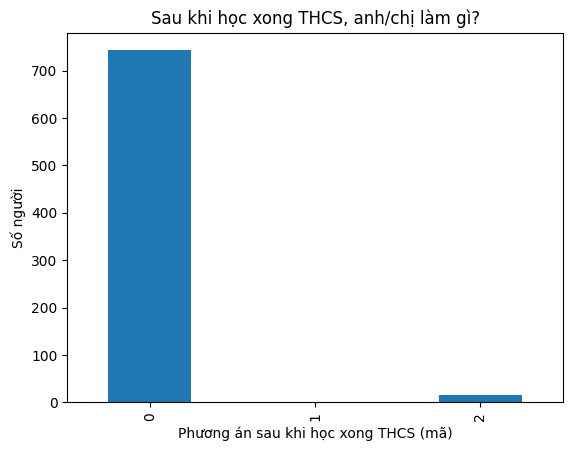

In [59]:
# SAU KHI HỌC XONG THCS THÌ ANH/CHỊ...? (p1q8_afloseschool)
plt.figure()
df['p1q8_afloseschool'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Phương án sau khi học xong THCS (mã)")
plt.ylabel("Số người")
plt.title("Sau khi học xong THCS, anh/chị làm gì?")

# Sau khi học xong THCS thì đa số học tiếp lên THPT, một số ít chọn đi làm 

# Tình trạng việc làm


Text(0.5, 1.0, 'Tình trạng đã từng đổi việc')

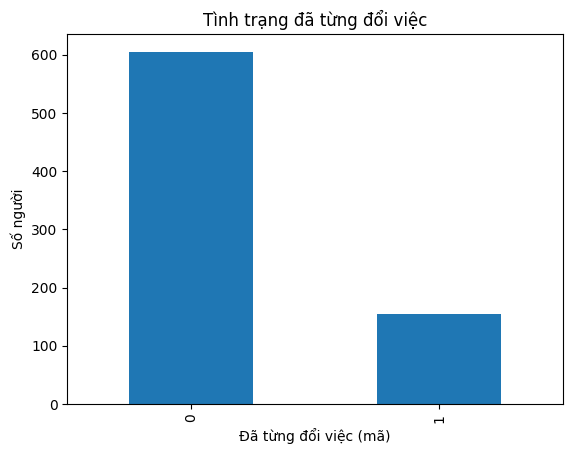

In [60]:
#  ĐÃ TỪNG ĐỔI VIỆC HAY CHƯA (p1q10_chanjob: 0/1)
plt.figure()
df['p1q10_chanjob'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Đã từng đổi việc (mã)")
plt.ylabel("Số người")
plt.title("Tình trạng đã từng đổi việc")

# Số người đã từng đổi việc nhiều hơn số người chưa từng đổi việc. Tình trạng đổi việc khá phổ biến hiện nay.

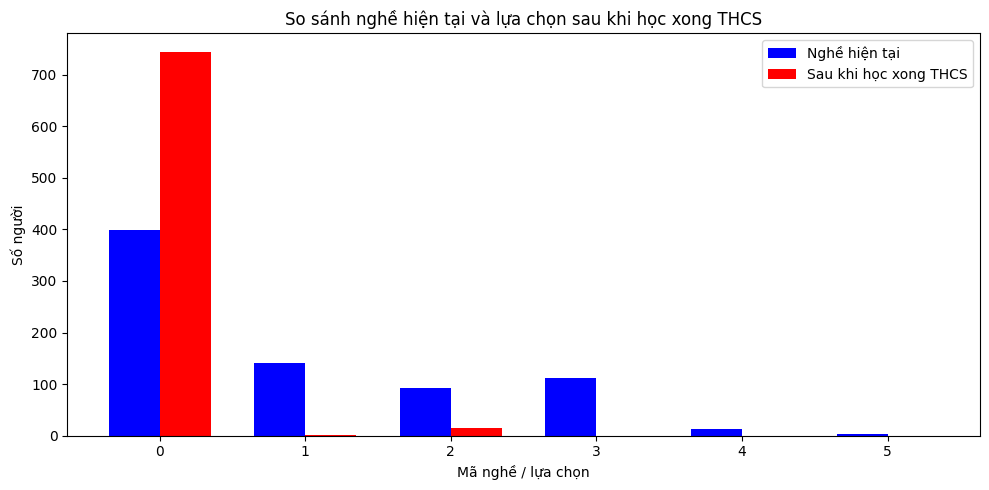

In [61]:
# Đếm tần suất theo mã
current_counts = df["p1q9_job_current"].value_counts().sort_index()
after_counts   = df["p1q8_afloseschool"].value_counts().sort_index()

# Đồng bộ các mã (phòng khi 1 bên thiếu mã nào đó)
all_codes = sorted(set(current_counts.index).union(after_counts.index))
current = current_counts.reindex(all_codes, fill_value=0)
after   = after_counts.reindex(all_codes, fill_value=0)

# Vẽ grouped bar chart
plt.figure(figsize=(10, 5))

bar_width = 0.35
x = range(len(all_codes))

plt.bar(
    [i - bar_width/2 for i in x],
    current,
    width=bar_width,
    color="blue",
    label="Nghề hiện tại",
)
plt.bar(
    [i + bar_width/2 for i in x],
    after,
    width=bar_width,
    color="red",
    label="Sau khi học xong THCS",
)

plt.xticks(list(x), all_codes)
plt.xlabel("Mã nghề / lựa chọn")
plt.ylabel("Số người")
plt.title("So sánh nghề hiện tại và lựa chọn sau khi học xong THCS")
plt.legend()
plt.tight_layout()
plt.show()

# Sau khi học xong THCS, nhiều người chọn nhóm nghành Kĩ thuật, công nghệ. Sau đó đổi nghề, phần bố tương đối hơn giữa các nhóm nghề, nhưng chủ yếu vẫn là nhóm nghành Kĩ thuật, công nghệ.

# Ảnh hưởng đến chọn việc làm 

p1q9_job_current      0     1     2     3    4    5
p1q15_hsub                                         
0                  46.7  29.2   4.8  16.8  2.1  0.3
1                  60.9   9.9  17.9  10.6  0.7  0.0
2                  48.8   6.1  23.2  20.1  1.8  0.0
3                  33.3  35.2  11.1  11.1  7.4  1.9
4                  52.9  29.4   5.9  11.8  0.0  0.0
5                  72.2   5.6  11.1  11.1  0.0  0.0
6                  87.5   0.0  12.5   0.0  0.0  0.0
7                  89.5   0.0   5.3   0.0  0.0  5.3
8                  66.7  33.3   0.0   0.0  0.0  0.0
9                  88.9   0.0  11.1   0.0  0.0  0.0
10                 66.7   0.0   0.0  33.3  0.0  0.0
11                100.0   0.0   0.0   0.0  0.0  0.0
12                100.0   0.0   0.0   0.0  0.0  0.0


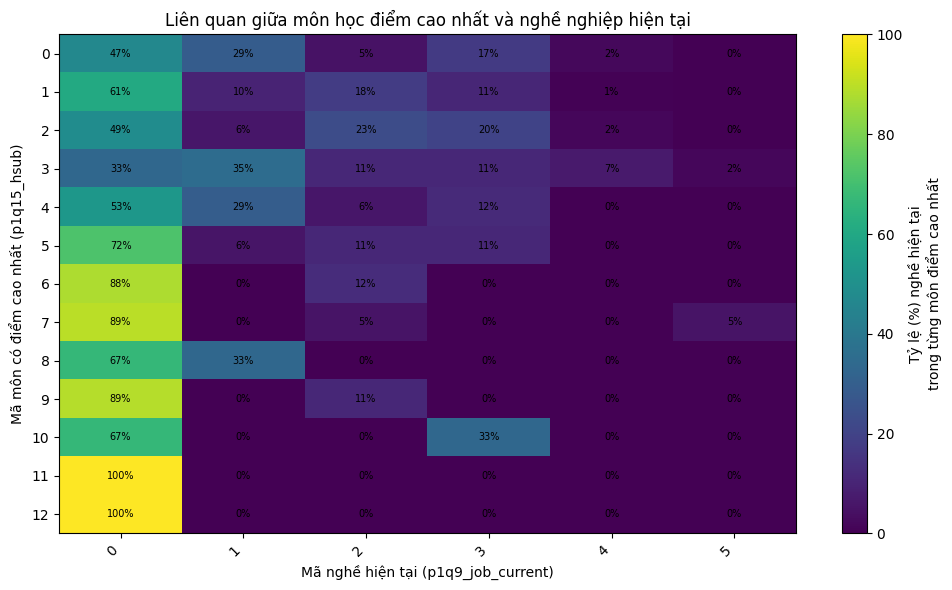

In [62]:
# Bảng chéo: mỗi dòng = 1 môn cao điểm, cột = nghề hiện tại (tính % theo từng môn)
ct = pd.crosstab(df['p1q15_hsub'],
                 df['p1q9_job_current'],
                 normalize='index') * 100

print(ct.round(1))   # xem bảng số
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(ct.values, aspect='auto')

# Tick & label
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

# Ghi giá trị %
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha='center', va='center', fontsize=7)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) nghề hiện tại\ntrong từng môn điểm cao nhất")

ax.set_xlabel("Mã nghề hiện tại (p1q9_job_current)")
ax.set_ylabel("Mã môn có điểm cao nhất (p1q15_hsub)")
ax.set_title("Liên quan giữa môn học điểm cao nhất và nghề nghiệp hiện tại")

plt.tight_layout()
plt.show()


p1q9_job_current      0     1     2     3    4    5
p1q16_likesub                                      
0                  79.3  11.4   4.3   3.6  0.7  0.7
1                  69.9   5.6  14.7   9.1  0.0  0.7
2                  41.8  19.2  18.5  18.5  2.1  0.0
3                  25.7  34.5  10.1  27.7  1.4  0.7
4                  30.6  38.8  10.6  12.9  7.1  0.0
5                  52.2  13.0  17.4  17.4  0.0  0.0
6                  50.0   3.6  14.3  25.0  7.1  0.0
7                  88.9   0.0   5.6   5.6  0.0  0.0
8                  50.0  25.0  25.0   0.0  0.0  0.0
9                  81.8   0.0   9.1   9.1  0.0  0.0
10                 25.0   0.0  50.0  25.0  0.0  0.0
11                100.0   0.0   0.0   0.0  0.0  0.0
12                 85.7   0.0  14.3   0.0  0.0  0.0


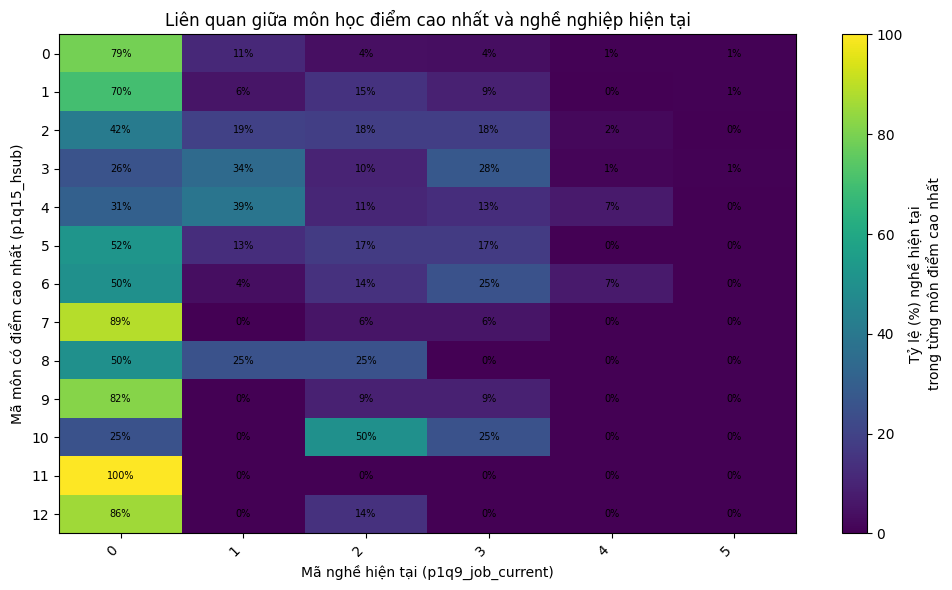

In [63]:
# Bảng chéo: mỗi dòng = 1 môn cao điểm, cột = nghề hiện tại (tính % theo từng môn)
ct = pd.crosstab(df['p1q16_likesub'],
                 df['p1q9_job_current'],
                 normalize='index') * 100

print(ct.round(1))   # xem bảng số
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(ct.values, aspect='auto')

# Tick & label
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

# Ghi giá trị %
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha='center', va='center', fontsize=7)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) nghề hiện tại\ntrong từng môn điểm cao nhất")

ax.set_xlabel("Mã nghề hiện tại (p1q9_job_current)")
ax.set_ylabel("Mã môn có điểm cao nhất (p1q15_hsub)")
ax.set_title("Liên quan giữa môn học điểm cao nhất và nghề nghiệp hiện tại")

plt.tight_layout()
plt.show()


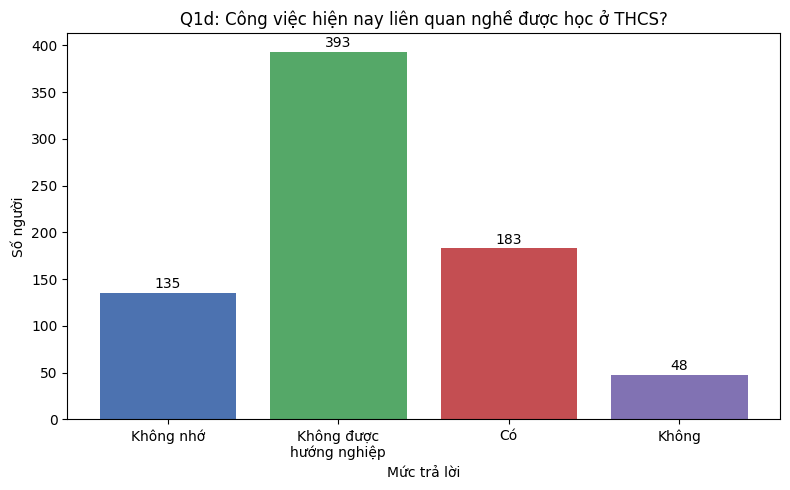

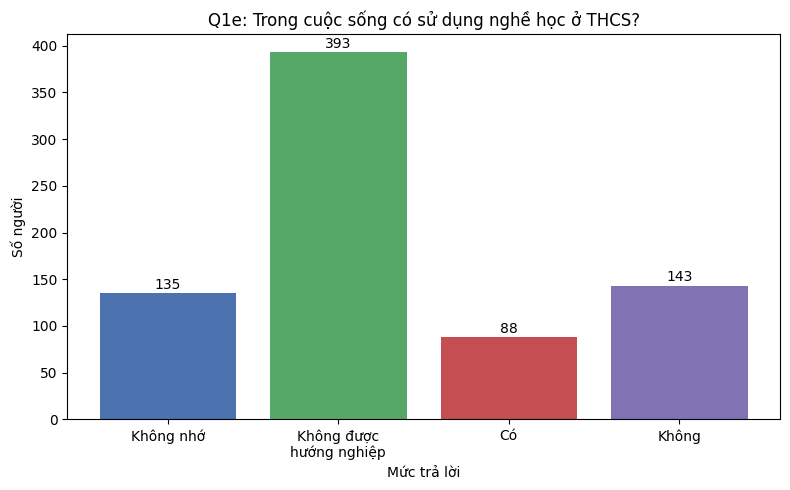

In [66]:
# Mapping ý nghĩa mã
label_map = {
    -1: "Không được\nhướng nghiệp",
    -2: "Không nhớ",
     0: "Có",
     1: "Không"
}

# Danh sách câu hỏi cần trực quan
questions = {
    "q1d_recurjob": "Q1d: Công việc hiện nay liên quan nghề được học ở THCS?",
    "q1e_lifeuse": "Q1e: Trong cuộc sống có sử dụng nghề học ở THCS?"
}

for col, title in questions.items():

    # Lấy tần suất
    counts = df[col].value_counts().sort_index()

    # Đổi mã thành chữ
    counts.index = counts.index.map(label_map)

    # Vẽ bar chart
    plt.figure(figsize=(8,5))
    plt.bar(counts.index, counts.values, color=['#4c72b0','#55a868','#c44e52','#8172b3'])
    
    plt.title(title)
    plt.ylabel("Số người")
    plt.xlabel("Mức trả lời")
    plt.xticks(rotation=0)
    
    # Ghi số lên cột
    for i, v in enumerate(counts.values):
        plt.text(i, v + 5, str(v), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()